## Mobile Price Prediction Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
trainData.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
trainData.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

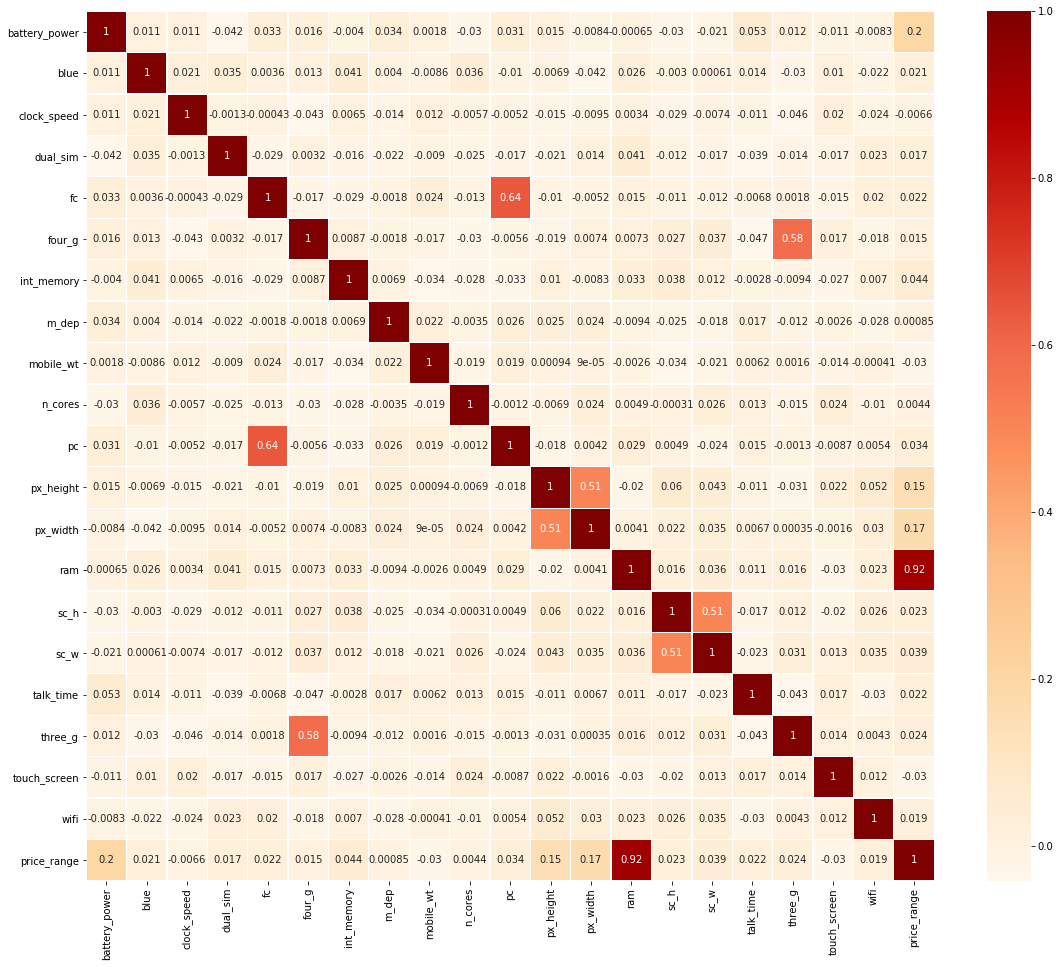

In [3]:
fig, ax = plt.subplots(figsize=(19,16))
sn.heatmap(trainData.corr(), linewidth=0.3, cmap='OrRd', robust=True, annot=True)

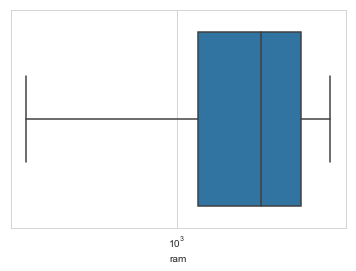

In [5]:
sn.set_style('whitegrid')
plt.xscale('log')
sn.boxplot(trainData['ram'])

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_df_columns = trainData.columns
X_df_columns = X_df_columns.drop('price_range')
Y_df_columns = ['price_range']

X_df = trainData[X_df_columns].values
Y_df = trainData[Y_df_columns].values

svc = SVC(kernel='linear')

X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

C:\Users\prabhtaj.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn import metrics

print(metrics.accuracy_score(Y_test, Y_pred))

0.97
